In [23]:
import librosa
from librosa import feature
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import pandas as pd

In [2]:
#load example audio file
ex_audio = 'audio/Rock_ZBmWznR5XfE.wav'
sr = 22050 #define default sampling rate
y, sample_rate = librosa.load(ex_audio, sr=sr) 

### Chroma Features: calculate mean chroma values for each chroma feature across all time frames

In [3]:
#np.mean(chroma_stft, axis=1): This line calculates the mean of the chroma_stft matrix along the specified axis, 
#which is axis 1. This means it computes the mean for each row (i.e., for each chroma feature) in the chroma_stft matrix. 
#The resulting array will contain the mean chroma values for each chroma feature across all the time frames. 
#In other words, it calculates the average energy of each musical pitch class (chroma) in the entire audio signal.
# The chroma_stft representation is a way to analyze the pitch content of an audio signal. 
#It divides the audio signal into short time frames and calculates the energy of different musical pitch classes (chroma) within each frame. 
#As a result, you get a matrix where each row represents a chroma feature, and each column represents a time frame


chroma_stft = feature.chroma_stft(y=y, sr=sr)
np.mean(chroma_stft, axis=1)

array([0.37525883, 0.39251104, 0.35419303, 0.30461043, 0.39313957,
       0.34996003, 0.257283  , 0.32826644, 0.3856919 , 0.42785645,
       0.3599518 , 0.3234211 ], dtype=float32)

In [4]:
#global summary of the pictch content
np.mean(chroma_stft)

0.35434532

In [5]:
np.mean(np.mean(chroma_stft, axis=1))

0.3543453

In [6]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
np.mean(chroma_cens, axis=1)

array([0.28850684, 0.2689603 , 0.3072656 , 0.22637597, 0.28938907,
       0.2272962 , 0.24238203, 0.30730978, 0.27166456, 0.3552453 ,
       0.25564072, 0.31126463], dtype=float32)

In [7]:
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
np.mean(chroma_cqt, axis=1)

array([0.62898767, 0.6013727 , 0.65737396, 0.47518936, 0.5984321 ,
       0.47901863, 0.5222014 , 0.6704136 , 0.5937278 , 0.7212866 ,
       0.5763302 , 0.67520756], dtype=float32)

### Spectral Features: 

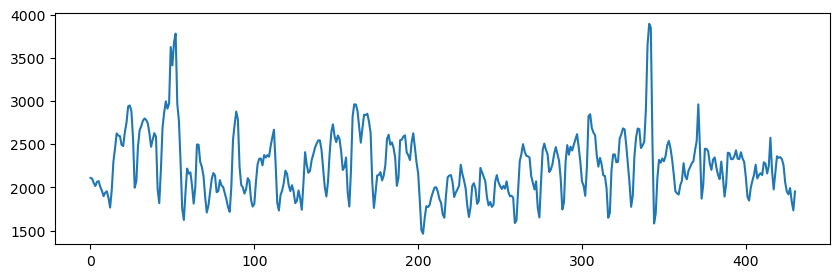

In [8]:
spectral_centroids = feature.spectral_centroid(y=y, sr=sr)[0]
plt.figure(figsize=(10,3))
plt.plot(spectral_centroids)

In [9]:
np.mean(spectral_centroids)

2249.976365227706

In [10]:
spectral_bandwidth = feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
np.mean(spectral_bandwidth)

2328.6515771423956

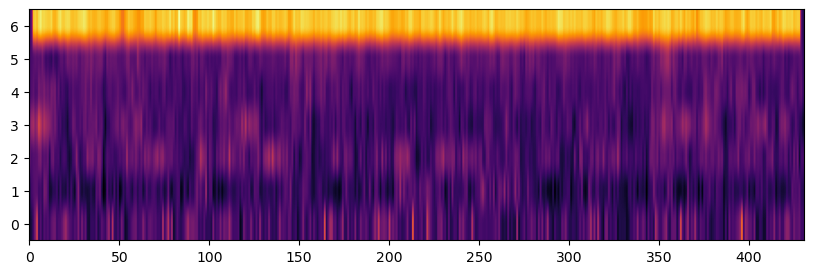

In [11]:
#Each frame of a spectrogram S is divided into sub-bands. For each sub-band, the energy contrast is estimated by
#comparing the mean energy in the top quantile (peak energy) to that of the bottom quantile (valley energy). 
#High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise
spectral_contrast = feature.spectral_contrast(y=y, sr=sr, n_bands=6)

plt.figure(figsize=(10,3))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='inferno')

In [12]:
np.mean(spectral_contrast, axis=1)

array([17.82691298, 14.56132289, 18.51609324, 17.9684375 , 17.65559089,
       19.67294616, 50.94855765])

In [13]:
spectral_rolloff = feature.spectral_rolloff(y=y, sr=sr)
spectral_rolloff[0]

array([3919.04296875, 3951.34277344, 3951.34277344, 3789.84375   ,
       3682.17773438, 3736.01074219, 3660.64453125, 3628.34472656,
       3596.04492188, 3725.24414062, 3800.61035156, 3736.01074219,
       3660.64453125, 4102.07519531, 4618.87207031, 5060.30273438,
       5727.83203125, 5738.59863281, 5577.09960938, 5383.30078125,
       5372.53417969, 4651.171875  , 4360.47363281, 4608.10546875,
       4618.87207031, 4586.57226562, 4425.07324219, 4242.04101562,
       4608.10546875, 5286.40136719, 5081.8359375 , 4963.40332031,
       5006.46972656, 4855.73730469, 4823.4375    , 4952.63671875,
       4780.37109375, 4543.50585938, 4844.97070312, 4801.90429688,
       4834.20410156, 4102.07519531, 3832.91015625, 4392.7734375 ,
       5340.234375  , 5598.6328125 , 5598.6328125 , 5243.33496094,
       5727.83203125, 8214.91699219, 8430.24902344, 8850.14648438,
       8699.4140625 , 6180.02929688, 5340.234375  , 4478.90625   ,
       3531.4453125 , 3165.38085938, 3596.04492188, 3972.87597

### Zero Crossing Rate

In [14]:
#zero crossing rate. add constant to y to control for any silence or intro at beginning of clip
zcr = feature.zero_crossing_rate(y + 0.0001)[0]
np.mean(zcr)

0.11315776355858469

### Mel Frequency Cepstral Coefficients

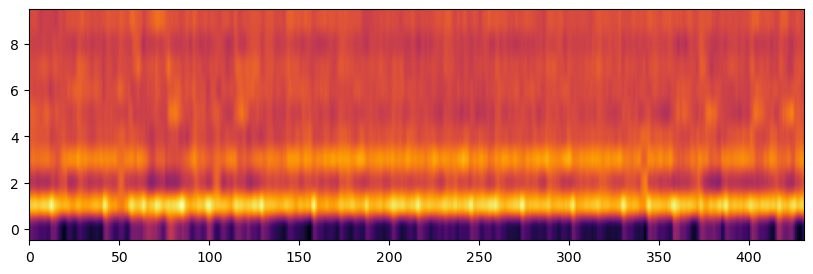

In [15]:
#mel-frequency cepstral coefficients
mfcc = feature.mfcc(y=y, sr=sr, n_mfcc=10)
plt.figure(figsize=(10,3))
plt.imshow(mfcc, aspect='auto', origin='lower', cmap='inferno')

In [16]:
np.mean(mfcc, axis=1)

array([-106.73871  ,   88.41477  ,   -9.930218 ,   44.02565  ,
          4.8468914,   -1.2211338,    2.7985935,    2.5931077,
         -9.125827 ,    5.97341  ], dtype=float32)

### Root Mean Squared

In [17]:
rms = librosa.feature.rms(y= y+0.0001)
np.mean(rms)

0.10858054

### Rythm Features

In [18]:
beat_track_tempo = librosa.beat.beat_track(y=y, sr=sr)[0]
beat_track_tempo

184.5703125

In [19]:
feature_tempo = np.mean(feature.tempo(y=y, sr=sr))
feature_tempo

89.10290948275862

### Signal Features

In [20]:
signal_mean = np.mean(abs(y))
signal_stdev = np.std(y)
signal_skewness = scipy.stats.skew(abs(y))
signal_kurtosis = scipy.stats.kurtosis(y)

### Feature Dataframe

In [21]:
def extract_features(audio_file):
    # Load the audio file using librosa
    sr = 22050
    y, sr = librosa.load(audio_file, sr=sr)

    # Extract chroma features for different equations
    chroma_stft = feature.chroma_stft(y=y, sr=sr)
    chroma_cens = feature.chroma_cens(y=y, sr=sr)
    chroma_cqt = feature.chroma_cqt(y=y, sr=sr)
    spectral_centroids = feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
    spectral_contrast = feature.spectral_contrast(y=y, sr=sr, n_bands=6)
    spectral_rolloff = feature.spectral_rolloff(y=y, sr=sr)[0]
    zcr = feature.zero_crossing_rate(y + 0.0001)[0]
    mfcc = feature.mfcc(y=y, sr=sr, n_mfcc=10)
    beat_track_tempo = librosa.beat.beat_track(y=y, sr=sr)[0]
    feature_tempo = np.mean(feature.tempo(y=y, sr=sr))
    rms = librosa.feature.rms(y= y+0.0001)
    

    # Calculate means for each chroma feature for each equation
    mean_chroma_stft = np.mean(chroma_stft, axis=1)
    global_mean_chroma_stft = np.mean(chroma_stft)
    mean_chroma_cens = np.mean(chroma_cens, axis=1)
    global_mean_cens = np.mean(chroma_cens)
    mean_chroma_cqt = np.mean(chroma_cqt, axis=1)
    global_mean_cqt = np.mean(chroma_cqt)
    mean_spectral_centroid = np.mean(spectral_centroids)
    mean_spectral_bandwidth = np.mean(spectral_bandwidth)
    mean_spectral_contrast = np.mean(spectral_contrast, axis=1)
    global_mean_spectral_contrast = np.mean(spectral_contrast)
    mean_spectral_rolloff = np.mean(spectral_rolloff)
    zero_crossing_rate = np.mean(zcr)
    global_mean_mfcc = np.mean(mfcc)
    mean_mfcc = np.mean(mfcc, axis=1)
    beat_track_tempo = beat_track_tempo
    feature_tempo = feature_tempo
    mean_rms = np.mean(rms)

    #Calulate means for signal feaures
    signal_mean = np.mean(abs(y))
    signal_stdev = np.std(y)
    signal_skewness = scipy.stats.skew(abs(y))
    signal_kurtosis = scipy.stats.kurtosis(y)
    
    

    # Create a dictionary to store the features
    features = {
        'file_name': os.path.basename(audio_file),
        # Chroma stft
        'global_mean_chroma_stft': global_mean_chroma_stft,
        'chroma_stft_1': mean_chroma_stft[0],
        'chroma_stft_2': mean_chroma_stft[1],
        'chroma_stft_3': mean_chroma_stft[2],
        'chroma_stft_4': mean_chroma_stft[3],
        'chroma_stft_5': mean_chroma_stft[4],
        'chroma_stft_6': mean_chroma_stft[5],
        'chroma_stft_7': mean_chroma_stft[6],
        'chroma_stft_8': mean_chroma_stft[7],
        'chroma_stft_9': mean_chroma_stft[8],
        'chroma_stft_10': mean_chroma_stft[9],
        'chroma_stft_11': mean_chroma_stft[10],
        'chroma_stft_12': mean_chroma_stft[11],
        # Chroma cens
        'global_mean_cens': global_mean_cens,
        'chroma_cens_1': mean_chroma_cens[0],
        'chroma_cens_2': mean_chroma_cens[1],
        'chroma_cens_3': mean_chroma_cens[2],
        'chroma_cens_4': mean_chroma_cens[3],
        'chroma_cens_5': mean_chroma_cens[4],
        'chroma_cens_6': mean_chroma_cens[5],
        'chroma_cens_7': mean_chroma_cens[6],
        'chroma_cens_8': mean_chroma_cens[7],
        'chroma_cens_9': mean_chroma_cens[8],
        'chroma_cens_10': mean_chroma_cens[9],
        'chroma_cens_11': mean_chroma_cens[10],
        'chroma_cens_12': mean_chroma_cens[11],
        # Chroma cqt
        'global_mean_cqt': global_mean_cqt,
        'chroma_cqt_1': mean_chroma_cqt[0],
        'chroma_cqt_2': mean_chroma_cqt[1],
        'chroma_cqt_3': mean_chroma_cqt[2],
        'chroma_cqt_4': mean_chroma_cqt[3],
        'chroma_cqt_5': mean_chroma_cqt[4],
        'chroma_cqt_6': mean_chroma_cqt[5],
        'chroma_cqt_7': mean_chroma_cqt[6],
        'chroma_cqt_8': mean_chroma_cqt[7],
        'chroma_cqt_9': mean_chroma_cqt[8],
        'chroma_cqt_10': mean_chroma_cqt[9],
        'chroma_cqt_11': mean_chroma_cqt[10],
        'chroma_cqt_12': mean_chroma_cqt[11],
        # Spectral Centroid
        'spectral_centroid': mean_spectral_centroid,
        # spectral bandwidt
        'spectral_bandwidth': spectral_bandwidth,
        #spectral contrast
        'global_mean_spectral_contrast': global_mean_spectral_contrast,
        'spectral_contrast_1': mean_spectral_contrast[0],
        'spectral_contrast_2': mean_spectral_contrast[1],
        'spectral_contrast_3': mean_spectral_contrast[2],
        'spectral_contrast_4': mean_spectral_contrast[3],
        'spectral_contrast_5': mean_spectral_contrast[4],
        'spectral_contrast_6': mean_spectral_contrast[5],
        'spectral_contrast_7': mean_spectral_contrast[6],
        #spectral rolloff
        'spectral_rolloff': mean_spectral_rolloff,
        #zero crossing rate
        'zero_crossing_rate': zero_crossing_rate,
        #mel frequency cepstral coefficients
        'global_mean_mfcc': global_mean_mfcc,
        'mfcc_1': mean_mfcc[0],
        'mfcc_2': mean_mfcc[1],
        'mfcc_3': mean_mfcc[2],
        'mfcc_4': mean_mfcc[3],
        'mfcc_5': mean_mfcc[4],
        'mfcc_6': mean_mfcc[5],
        'mfcc_7': mean_mfcc[6],
        'mfcc_8': mean_mfcc[7],
        'mfcc_9': mean_mfcc[8],
        'mfcc_10': mean_mfcc[9],
        #tempo
        'beat_track_tempo': beat_track_tempo,
        'feature_tempo': feature_tempo,
        #rms
        'mean_rms': mean_rms,
        #time features
        'signal mean': signal_mean,
        'signal stdev': signal_stdev,
        'signal skewness': signal_skewness,
        'signal kurtosis': signal_kurtosis

    }

    return features


In [22]:
audio_directory = 'audio/'
features_list = []

for file in tqdm(os.listdir(audio_directory)):
    if file.endswith('.wav'):
        audio_file = os.path.join(audio_directory, file)
        features = extract_features(audio_file) 
        features['file_name'] = file
        features_list.append(features)




  0%|                                        | 33/14964 [00:07<58:01,  4.29it/s]/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=733
  warnings.warn(
  4%|█▍                                     | 552/14964 [02:10<55:46,  4.31it/s]/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
 25%|█████████▍                            | 3727/14964 [14:38<42:56,  4.36it/s]/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=749
  warnings.warn(
 28%|██████████▋                           | 4233/14964 [16:37<42:03,  4.25it/s]/Users/emilykrueger/anaconda3/envs/learn2/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=10

NameError: name 'pd' is not defined

In [26]:
features_df = pd.DataFrame(features_list)
features_df.head()

,file_name,global_mean_chroma_stft,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,...,mfcc_8,mfcc_9,mfcc_10,beat_track_tempo,feature_tempo,mean_rms,signal mean,signal stdev,signal skewness,signal kurtosis
0,Rock_-19alzpMU-c.wav,0.192805,0.220653,0.142173,0.317379,0.627190,0.331437,0.105276,0.077094,0.137757,...,-7.662191,-4.719162,2.901975,123.046875,123.046875,0.255951,0.218126,0.262102,0.472732,-0.743146
1,Country_f_w51dScxG4.wav,0.318247,0.371738,0.237135,0.302602,0.239812,0.343882,0.625834,0.351502,0.281943,...,0.835263,-8.066938,2.793537,198.768029,103.359375,0.045809,0.036545,0.048993,1.568105,1.367456
2,Pop_rGWqmpYlqlo.wav,0.279755,0.466868,0.285492,0.293551,0.291615,0.305668,0.386475,0.190737,0.211070,...,12.402742,-10.096862,11.202353,135.999178,135.999178,0.122223,0.099287,0.123268,0.828036,-0.263702
3,Country_O4c49u2hF9Y.wav,0.396164,0.599610,0.380724,0.393380,0.283230,0.451029,0.311423,0.343359,0.602937,...,-1.103467,-7.442063,3.041404,143.554688,143.554688,0.076978,0.059898,0.086257,2.326915,3.979702
4,EDM_CKEEuAiKs4o.wav,0.363939,0.291502,0.319534,0.280140,0.320624,0.414379,0.280164,0.247661,0.359423,...,-3.780568,-4.684977,-1.892321,129.199219,129.199219,0.103608,0.083905,0.108583,1.216033,0.497518


In [27]:
file_name = 'features/audio_features.csv'
features_df.to_csv(file_name, index=False)